<a href="https://colab.research.google.com/github/DarkMagicianK/MLpracticos2022/blob/main/Tp2/Tp2_ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N°2
Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

Text(0.5, 1.0, 'Clase B')

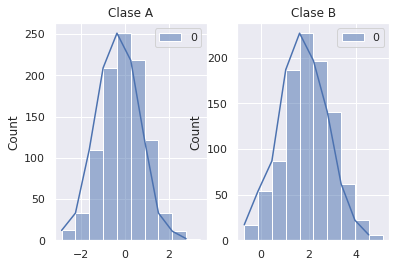

In [ ]:
#@title Generación de las dos clases
#import inspector
#inspector.watch_globals()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")


# Funciones adicionales
def clasificador(datos,T):
    prediccion = np.zeros(datos.shape);
    prediccion[datos > T] = 1;
    return(prediccion);

def indicadores(clase,prediccion,N):
    # np.sum(prediccion): cant. total de detecciones + (suma predicciones positivas))
    # N:                  cant. total casos correctos (suma de condiciones positivas)

    TP = np.sum( np.logical_and(clase,prediccion));
    PP = np.sum(prediccion > 0.5)
    Precision = TP/PP; 
    Sensibilidad = TP/N;
    return((Precision,Sensibilidad))    
    
# Generacón de Datos Sinteticos
N = 1000; # Cantidad de datos
[muA, sigmaA] = [0, 1]; # media y desvio estandar
[muB, sigmaB] = [2, 1]; # media y desvio estandar
datosA = np.random.normal(muA, sigmaA, size=(N,1)); #creando muestra de datosA
datosB = np.random.normal(muB, sigmaB, N)[:,None]; #creando muestra de datosB
claseA = np.zeros(datosA.shape);
claseB = np.ones(datosB.shape);
Datos = np.concatenate((datosA,datosB));
Clases = np.concatenate( (claseA,claseB) );
Predicciones = np.zeros(Clases.shape);
#%%
# Graficando histograma
# histograma de distribución normal.
_,ax = plt.subplots(1,2)
sns.histplot(data=datosA, bins=10, ax=ax[0])
sns.histplot(data=datosB, bins=10, ax=ax[1])
#_,ax1 = plt.subplots(1,2)
countA,xA = np.histogram(datosA);
countB,xB = np.histogram(datosB);
ax[0].plot(xA[0:len(xA)-1],countA);
ax[1].plot(xB[0:len(xB)-1],countB);

ax[0].set_title('Clase A')
ax[1].set_title('Clase B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5, 1.0, 'Precisión vs Recall')

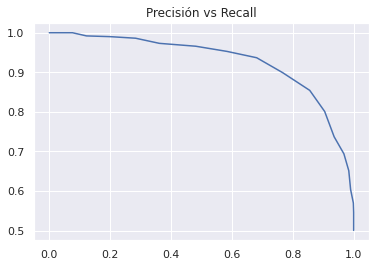

In [ ]:
# Clasificación e indicadores
T_vec = np.linspace(Datos.min(), Datos.max(),30);
Precision = np.zeros(T_vec.shape);
Sensibilidad = np.zeros(T_vec.shape);
  
for i in range(T_vec.size):
    T = T_vec[i];
    Predicciones = clasificador(Datos,T);
    # Indicadores
    pys = indicadores(Clases,Predicciones,N); # N es  ant. total casos correctos (suma de condiciones positivas)
    Precision[i] = pys[0];
    Sensibilidad[i] = pys[1];

plt.plot(Sensibilidad,Precision);
plt.title('Precisión vs Recall')


#%%
#sns.pairplot(data_covid,diag_kind="kde")